<a href="https://colab.research.google.com/github/ardra1111/Neural-Networks/blob/main/Implementation_of_AdaGrad_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**ADAGRAD ALGORITHM**


Adagrad is an **adaptive learning rate optimization algorithm** used in machine learning to **optimize** functions (**minimize loss**) during training. It addresses the issue of a fixed learning rate potentially leading to slow convergence or oscillations in the loss function.

**Key Idea:**

- **Adaptively adjusts the learning rate for each parameter** based on the **historical gradients** encountered during training.
- Parameters with **steeper gradients** (indicating a more significant impact on the loss) receive **smaller learning rates** to prevent large jumps and ensure stability.
- Parameters with **flatter gradients** (less impact) receive **larger learning rates** to encourage faster updates.

**Here's how it works:**

1. **Initialize:**
   - Set an initial **learning rate (eta)** for all parameters.
   - Create an accumulator (`h`) for each parameter, initialized to zeros.

2. **Iteration:**
   - For each training step:
     - Calculate the **gradient (g)** of the loss function with respect to each parameter.
     - **Update the accumulator:** `h_t = h_(t-1) + g_t^2` (square the gradient and add to the accumulator).
     - **Adaptive Learning Rate Update:** `eta_t = eta / (sqrt(h_t) + epsilon)`
     - `epsilon` is a small value (e.g., 1e-8) to prevent division by zero.
     - **Update the parameter:** `theta_t = theta_(t-1) - eta_t * g_t`

**Benefits:**

- **Faster convergence** for problems with non-uniform gradients.
- **Reduces oscillations** in the loss function.
- **Can handle sparse gradients** efficiently.

**Considerations:**

- May not be suitable for all problems, especially those with very noisy gradients.
- Can lead to overly small learning rates later in training, potentially slowing down convergence.

**In essence, Adagrad personalizes the learning rate for each parameter, leading to more efficient optimization in many machine learning applications.**


##**ADAGRAD FORMULA**

In [ ]:
from IPython.display import Latex

Latex(r'''
\begin{align*}
\text{1. Initialize weights and gradient accumulator:} \quad & \mathbf{W}_0 \sim \mathcal{N}(0, 1) \quad \text{and} \quad G_0 = 0 \\
\text{2. Compute gradient } g_t \text{ at step } t: \quad & g_t = \nabla_{\mathbf{W}} L(\mathbf{W}_t) \\
\text{3. Update the gradient accumulator:} \quad & G_t = G_{t-1} + g_t^2 \\
\text{4. Update the weights using the AdaGrad rule:} \quad & \mathbf{W}_{t+1} = \mathbf{W}_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot g_t \\
\text{where} \quad & \mathbf{W}_t \text{ are the weights at step } t, \\
& \eta \text{ is the learning rate}, \\
& G_t \text{ is the accumulated gradient}, \\
& \epsilon \text{ is a small constant to prevent division by zero}, \\
& \odot \text{ denotes element-wise multiplication}, \\
& L(\mathbf{W}_t) \text{ is the loss function}.
\end{align*}
''')


<IPython.core.display.Latex object>

##**ANIMATION OF ADAGRAD ALGORITHM**

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
44 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
l

In [ ]:
from manim import *

In [ ]:
%%manim -ql AdaGrad
config.media_embed = True
from manim import *

class AdaGrad(Scene):
    def construct(self):
        self.camera.background_color = BLACK
        self.intro()
        self.show_explanation_and_formula()
        self.show_function()
        self.adagrad_steps()

    def intro(self):
        intro_text = Text("AdaGrad Algorithm", font_size=58, color=YELLOW)
        description = Text("An adaptive learning rate algorithm for gradient descent.", font_size=29)
        description.next_to(intro_text, DOWN)
        self.play(Write(intro_text), run_time=2)
        self.play(FadeIn(description), run_time=2)
        self.wait(2)
        self.play(FadeOut(intro_text), FadeOut(description))

    def show_explanation_and_formula(self):
        explanation = Text(
            "AdaGrad uses different learning rates for each parameter at each iteration.",
            font_size=27,
            color=WHITE
        ).to_edge(UP, buff=1.2)
        important_point = Text(
            "This is the key feature of AdaGrad!",
            font_size=28,
            color=WHITE
        ).next_to(explanation, DOWN, buff= 0.5)

        formula_title = Text("FORMULA", font_size=36, color=YELLOW).next_to(important_point, DOWN*2, buff= 0.625)
        formula = MathTex(
            r"\mathbf{W}_{t+1} = \mathbf{W}_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot g_t",
            font_size=48,
            color=WHITE
        ).next_to(formula_title, DOWN,buff=0.9)

        self.play(Write(explanation), run_time=2)
        self.play(Write(important_point), run_time=2)
        self.wait(1)
        self.play(Write(formula_title), run_time=2)
        self.play(Write(formula), run_time=2)
        self.wait(2)
        self.play(FadeOut(explanation), FadeOut(important_point), FadeOut(formula_title), FadeOut(formula))

    def show_function(self):
        self.axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[-1, 5, 1],
            axis_config={"color": BLUE},
        )
        graph = self.axes.plot(lambda x: x**2, color=GREEN)
        graph_label = self.axes.get_graph_label(graph, label="f(x) = x^2", x_val=2, direction=UR)

        self.play(Create(self.axes), run_time=2)
        self.play(Create(graph), run_time=2)
        self.play(FadeIn(graph_label))
        self.wait(2)

    def adagrad_steps(self):
        start_point = np.array([-2, 4, 0])
        steps = [start_point]
        learning_rate = 1.0
        epsilon = 1e-8
        gradient_accumulated = 0

        # Generating steps
        for _ in range(10):
            grad = 2 * steps[-1][0]  # Gradient of f(x) = x^2
            gradient_accumulated += grad**2
            adjusted_lr = learning_rate / (np.sqrt(gradient_accumulated) + epsilon)
            next_point = steps[-1][0] - adjusted_lr * grad
            steps.append(np.array([next_point, next_point**2, 0]))

        points = VGroup(*[Dot(self.axes.c2p(*pt[:2]), color=RED) for pt in steps])
        lines = VGroup(*[Line(self.axes.c2p(*steps[i][:2]), self.axes.c2p(*steps[i+1][:2]), color=YELLOW) for i in range(len(steps)-1)])

        self.play(Create(points[0]))

        epoch_text = Text("Epoch Nmber: 0", font_size=24)
        epoch_text.to_edge(LEFT).shift(DOWN*1.5)
        self.play(FadeIn(epoch_text))

        for i in range(len(steps)-1):
            self.play(Create(lines[i]))
            self.play(Create(points[i+1]))

            grad = 2 * steps[i][0]
            gradient_accumulated += grad**2
            adjusted_lr = learning_rate / (np.sqrt(gradient_accumulated) + epsilon)
            lr_text = Text(f"Learning Rate: {adjusted_lr:.4f}", font_size=24, color=WHITE)
            lr_text.next_to(self.axes.c2p(*steps[i+1][:2]), UP)

            # Update epoch text
            self.play(Transform(epoch_text, Text(f"Epoch Number: {i+1}", font_size=24).to_edge(LEFT).shift(DOWN*1.5)))

            self.play(GrowArrow(Arrow(self.axes.c2p(*steps[i][:2]), self.axes.c2p(*steps[i+1][:2]), buff=0, color =PINK)))
            self.play(FadeIn(lr_text))
            self.wait(1)
            self.play(FadeOut(lr_text))

        # Ensure the final epoch number remains
        self.play(FadeOut(epoch_text))
        final_epoch_text = Text(f"Final Epoch Number: {len(steps)-1}", font_size=24)
        final_epoch_text.to_edge(LEFT).shift(DOWN*1.5)
        self.play(FadeIn(final_epoch_text))

        self.wait(3)

if __name__ == "__main__":
    from manim import *
    config.pixel_height = 720
    config.pixel_width = 1280
    config.frame_rate = 30
    scene = AdaGrad()
    scene.render()

[06/08/24 14:27:16] INFO     Animation 0 : Partial movie file written in                   ]8;id=253842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=711365;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/201                         
                             6333726_3402263429_223132457.mp4'                                                     

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/2016333726_3402263429_223132457.mp4'


[06/08/24 14:27:19] INFO     Animation 1 : Partial movie file written in                   ]8;id=543947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=836847;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_658035249_204298192.mp4'                                                       

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_658035249_204298192.mp4'


[06/08/24 14:27:20] INFO     Animation 2 : Partial movie file written in                   ]8;id=313244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=524930;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_784179552_3976409467.mp4'                                                      

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_784179552_3976409467.mp4'


[06/08/24 14:27:22] INFO     Animation 3 : Partial movie file written in                   ]8;id=115497;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=719387;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_401783117_1358529590.mp4'                                                      

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_401783117_1358529590.mp4'


                    INFO     Writing \mathbf{W}_{t+1} = \mathbf{W}_t -                      ]8;id=43106;file:///usr/local/lib/python3.10/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=899593;file:///usr/local/lib/python3.10/dist-packages/manim/utils/tex_file_writing.py#109\109]8;;\
                             \frac{\eta}{\sqrt{G_t + \epsilon}} \odot g_t to                                       
                             media/Tex/42bfa49d1fdcc985.tex                                                        

INFO:manim:Writing \mathbf{W}_{t+1} = \mathbf{W}_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot g_t to media/Tex/42bfa49d1fdcc985.tex


[06/08/24 14:27:28] INFO     Animation 4 : Partial movie file written in                   ]8;id=571302;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=764188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1070422473_4131132508.mp4'                                                     

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1070422473_4131132508.mp4'


[06/08/24 14:27:31] INFO     Animation 5 : Partial movie file written in                   ]8;id=837831;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=68989;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_902960696_1352622001.mp4'                                                      

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_902960696_1352622001.mp4'


[06/08/24 14:27:32] INFO     Animation 6 : Partial movie file written in                   ]8;id=296400;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=528901;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_2569130560.mp4'                                                     

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_2569130560.mp4'


[06/08/24 14:27:35] INFO     Animation 7 : Partial movie file written in                   ]8;id=7800;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=612917;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2723889825_3267980671.mp4'                                                     

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2723889825_3267980671.mp4'


[06/08/24 14:27:37] INFO     Animation 8 : Partial movie file written in                   ]8;id=93997;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=41096;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1857902785_59183126.mp4'                                                       

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1857902785_59183126.mp4'


[06/08/24 14:27:39] INFO     Animation 9 : Partial movie file written in                   ]8;id=621446;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=97796;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_784179552_2862512039.mp4'                                                      

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_784179552_2862512039.mp4'


[06/08/24 14:27:43] INFO     Animation 10 : Partial movie file written in                  ]8;id=57949;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=259686;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4050520354_1612121146.mp4'                                                     

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4050520354_1612121146.mp4'


                    INFO     Writing f(x) = x^2 to media/Tex/70250a2defbcb87c.tex           ]8;id=884190;file:///usr/local/lib/python3.10/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=916494;file:///usr/local/lib/python3.10/dist-packages/manim/utils/tex_file_writing.py#109\109]8;;\

INFO:manim:Writing f(x) = x^2 to media/Tex/70250a2defbcb87c.tex


[06/08/24 14:27:45] INFO     Animation 11 : Partial movie file written in                  ]8;id=873020;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=422448;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3988360906_648508397.mp4'                                                      

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3988360906_648508397.mp4'


[06/08/24 14:27:47] INFO     Animation 12 : Partial movie file written in                  ]8;id=154856;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=914770;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_230838138_2267533781.mp4'                                                      

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_230838138_2267533781.mp4'


[06/08/24 14:27:48] INFO     Animation 13 : Partial movie file written in                  ]8;id=236518;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=480331;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_641130042_2254948097.mp4'                                                      

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_641130042_2254948097.mp4'


[06/08/24 14:27:49] INFO     Animation 14 : Partial movie file written in                  ]8;id=573510;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=554388;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_784179552_3250795762.mp4'                                                      

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_784179552_3250795762.mp4'


[06/08/24 14:27:50] INFO     Animation 15 : Partial movie file written in                  ]8;id=814483;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=554528;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2088579422_2058918307.mp4'                                                     

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2088579422_2058918307.mp4'


[06/08/24 14:27:52] INFO     Animation 16 : Partial movie file written in                  ]8;id=234188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=280718;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1913881187_3863463641.mp4'                                                     

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1913881187_3863463641.mp4'


[06/08/24 14:27:53] INFO     Animation 17 : Partial movie file written in                  ]8;id=533028;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=693233;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1327325133_3756345883.mp4'                                                     

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1327325133_3756345883.mp4'


[06/08/24 14:27:55] INFO     Animation 18 : Partial movie file written in                  ]8;id=808635;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=959583;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2956830740_4288367650.mp4'                                                     

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2956830740_4288367650.mp4'


[06/08/24 14:27:59] INFO     Animation 19 : Partial movie file written in                  ]8;id=176243;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=169851;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3609757397_1882696679.mp4'                                                     

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3609757397_1882696679.mp4'


[06/08/24 14:28:01] INFO     Animation 20 : Partial movie file written in                  ]8;id=270075;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=171214;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4141079408_459823083.mp4'                                                      

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4141079408_459823083.mp4'


[06/08/24 14:28:04] INFO     Animation 21 : Partial movie file written in                  ]8;id=308005;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=395720;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_946572196_2270753132.mp4'                                                      

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_946572196_2270753132.mp4'


[06/08/24 14:28:05] INFO     Animation 22 : Partial movie file written in                  ]8;id=415088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=277141;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_3589077654.mp4'                                                     

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_3589077654.mp4'


[06/08/24 14:28:06] INFO     Animation 23 : Partial movie file written in                  ]8;id=327555;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=465758;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_544622552_3006210456.mp4'                                                      

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_544622552_3006210456.mp4'


[06/08/24 14:28:08] INFO     Animation 24 : Partial movie file written in                  ]8;id=190566;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=108215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3592192486_1770973888.mp4'                                                     

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3592192486_1770973888.mp4'


[06/08/24 14:28:10] INFO     Animation 25 : Partial movie file written in                  ]8;id=397619;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=927732;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_873872934_4115795395.mp4'                                                      

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_873872934_4115795395.mp4'


[06/08/24 14:28:12] INFO     Animation 26 : Partial movie file written in                  ]8;id=396419;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=54451;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_229520368_1355933732.mp4'                                                      

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_229520368_1355933732.mp4'


[06/08/24 14:28:14] INFO     Animation 27 : Partial movie file written in                  ]8;id=499982;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=88846;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1161929584_413859376.mp4'                                                      

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1161929584_413859376.mp4'


[06/08/24 14:28:16] INFO     Animation 28 : Partial movie file written in                  ]8;id=618373;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292224;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_365828462_3275735444.mp4'                                                      

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_365828462_3275735444.mp4'


[06/08/24 14:28:17] INFO     Animation 29 : Partial movie file written in                  ]8;id=920343;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=688519;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_4268195628.mp4'                                                     

INFO:manim:Animation 29 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_4268195628.mp4'


[06/08/24 14:28:18] INFO     Animation 30 : Partial movie file written in                  ]8;id=814735;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=854812;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1247083492_1905499465.mp4'                                                     

INFO:manim:Animation 30 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1247083492_1905499465.mp4'


[06/08/24 14:28:19] INFO     Animation 31 : Partial movie file written in                  ]8;id=927192;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=269441;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_24742162_302469469.mp4'                                                        

INFO:manim:Animation 31 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_24742162_302469469.mp4'


[06/08/24 14:28:20] INFO     Animation 32 : Partial movie file written in                  ]8;id=595434;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=629853;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4149926038_3643444078.mp4'                                                     

INFO:manim:Animation 32 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4149926038_3643444078.mp4'


[06/08/24 14:28:23] INFO     Animation 33 : Partial movie file written in                  ]8;id=814067;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=932413;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2143214230_4147771477.mp4'                                                     

INFO:manim:Animation 33 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2143214230_4147771477.mp4'


[06/08/24 14:28:24] INFO     Animation 34 : Partial movie file written in                  ]8;id=262814;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=654947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1020485009_1835638329.mp4'                                                     

INFO:manim:Animation 34 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1020485009_1835638329.mp4'


[06/08/24 14:28:25] INFO     Animation 35 : Partial movie file written in                  ]8;id=528950;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=552561;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_415777587_612164947.mp4'                                                       

INFO:manim:Animation 35 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_415777587_612164947.mp4'


[06/08/24 14:28:26] INFO     Animation 36 : Partial movie file written in                  ]8;id=98009;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=320003;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_1438859694.mp4'                                                     

INFO:manim:Animation 36 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_1438859694.mp4'


[06/08/24 14:28:27] INFO     Animation 37 : Partial movie file written in                  ]8;id=96276;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=471641;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1300091391_1700944583.mp4'                                                     

INFO:manim:Animation 37 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1300091391_1700944583.mp4'


[06/08/24 14:28:28] INFO     Animation 38 : Partial movie file written in                  ]8;id=262048;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=59325;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2221790222_2990938693.mp4'                                                     

INFO:manim:Animation 38 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2221790222_2990938693.mp4'


[06/08/24 14:28:29] INFO     Animation 39 : Partial movie file written in                  ]8;id=21952;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=3107;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3593771535_3289145066.mp4'                                                     

INFO:manim:Animation 39 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3593771535_3289145066.mp4'


[06/08/24 14:28:31] INFO     Animation 40 : Partial movie file written in                  ]8;id=67892;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=151240;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2417431984_194282991.mp4'                                                      

INFO:manim:Animation 40 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2417431984_194282991.mp4'


[06/08/24 14:28:32] INFO     Animation 41 : Partial movie file written in                  ]8;id=922099;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=356966;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_513576264_3746078201.mp4'                                                      

INFO:manim:Animation 41 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_513576264_3746078201.mp4'


[06/08/24 14:28:33] INFO     Animation 42 : Partial movie file written in                  ]8;id=104051;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=754363;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2299192960_2932047627.mp4'                                                     

INFO:manim:Animation 42 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2299192960_2932047627.mp4'


[06/08/24 14:28:34] INFO     Animation 43 : Partial movie file written in                  ]8;id=705506;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=602768;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_2544318097.mp4'                                                     

INFO:manim:Animation 43 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_2544318097.mp4'


[06/08/24 14:28:36] INFO     Animation 44 : Partial movie file written in                  ]8;id=929169;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=838602;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1032376080_1501760353.mp4'                                                     

INFO:manim:Animation 44 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1032376080_1501760353.mp4'


[06/08/24 14:28:37] INFO     Animation 45 : Partial movie file written in                  ]8;id=788709;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=143930;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2605558740_2048343069.mp4'                                                     

INFO:manim:Animation 45 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2605558740_2048343069.mp4'


[06/08/24 14:28:38] INFO     Animation 46 : Partial movie file written in                  ]8;id=464596;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=80925;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3408185891_3561464604.mp4'                                                     

INFO:manim:Animation 46 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3408185891_3561464604.mp4'


[06/08/24 14:28:40] INFO     Animation 47 : Partial movie file written in                  ]8;id=518728;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=968733;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2913726021_3425231118.mp4'                                                     

INFO:manim:Animation 47 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2913726021_3425231118.mp4'


[06/08/24 14:28:42] INFO     Animation 48 : Partial movie file written in                  ]8;id=682033;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=719307;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_451942132_1584314511.mp4'                                                      

INFO:manim:Animation 48 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_451942132_1584314511.mp4'


[06/08/24 14:28:44] INFO     Animation 49 : Partial movie file written in                  ]8;id=23985;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=402522;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2691806372_1250863364.mp4'                                                     

INFO:manim:Animation 49 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2691806372_1250863364.mp4'


[06/08/24 14:28:45] INFO     Animation 50 : Partial movie file written in                  ]8;id=565309;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=366244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_610537554.mp4'                                                      

INFO:manim:Animation 50 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_610537554.mp4'


[06/08/24 14:28:46] INFO     Animation 51 : Partial movie file written in                  ]8;id=981750;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=315559;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_771372736_2517422903.mp4'                                                      

INFO:manim:Animation 51 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_771372736_2517422903.mp4'


[06/08/24 14:28:48] INFO     Animation 52 : Partial movie file written in                  ]8;id=747677;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=570403;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3438224576_2195629523.mp4'                                                     

INFO:manim:Animation 52 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3438224576_2195629523.mp4'


[06/08/24 14:28:49] INFO     Animation 53 : Partial movie file written in                  ]8;id=822396;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=767397;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1078562767_3716304682.mp4'                                                     

INFO:manim:Animation 53 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1078562767_3716304682.mp4'


[06/08/24 14:28:51] INFO     Animation 54 : Partial movie file written in                  ]8;id=212224;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=37149;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1985779694_1742197539.mp4'                                                     

INFO:manim:Animation 54 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1985779694_1742197539.mp4'


[06/08/24 14:28:52] INFO     Animation 55 : Partial movie file written in                  ]8;id=492469;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=380854;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1280791009_4266537031.mp4'                                                     

INFO:manim:Animation 55 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1280791009_4266537031.mp4'


[06/08/24 14:28:53] INFO     Animation 56 : Partial movie file written in                  ]8;id=270439;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257705;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3850209801_2293296412.mp4'                                                     

INFO:manim:Animation 56 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3850209801_2293296412.mp4'


[06/08/24 14:28:54] INFO     Animation 57 : Partial movie file written in                  ]8;id=265602;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=41353;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_3432927554.mp4'                                                     

INFO:manim:Animation 57 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_3432927554.mp4'


[06/08/24 14:28:55] INFO     Animation 58 : Partial movie file written in                  ]8;id=443203;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=430401;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1760954477_53208753.mp4'                                                       

INFO:manim:Animation 58 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1760954477_53208753.mp4'


[06/08/24 14:28:56] INFO     Animation 59 : Partial movie file written in                  ]8;id=563100;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461062;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2980597159_3257718903.mp4'                                                     

INFO:manim:Animation 59 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2980597159_3257718903.mp4'


[06/08/24 14:28:57] INFO     Animation 60 : Partial movie file written in                  ]8;id=813855;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=859355;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2789240089_647068209.mp4'                                                      

INFO:manim:Animation 60 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2789240089_647068209.mp4'


[06/08/24 14:28:59] INFO     Animation 61 : Partial movie file written in                  ]8;id=585476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=155674;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3232582041_1778101345.mp4'                                                     

INFO:manim:Animation 61 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3232582041_1778101345.mp4'


[06/08/24 14:29:00] INFO     Animation 62 : Partial movie file written in                  ]8;id=3658;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=343289;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2571603554_3777550322.mp4'                                                     

INFO:manim:Animation 62 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2571603554_3777550322.mp4'


[06/08/24 14:29:03] INFO     Animation 63 : Partial movie file written in                  ]8;id=433111;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=24725;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3989905258_3619985904.mp4'                                                     

INFO:manim:Animation 63 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3989905258_3619985904.mp4'


                    INFO     Animation 64 : Partial movie file written in                  ]8;id=662791;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=380939;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_3422356113.mp4'                                                     

INFO:manim:Animation 64 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_3422356113.mp4'


[06/08/24 14:29:05] INFO     Animation 65 : Partial movie file written in                  ]8;id=326244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=136915;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1443984613_2393034744.mp4'                                                     

INFO:manim:Animation 65 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1443984613_2393034744.mp4'


[06/08/24 14:29:06] INFO     Animation 66 : Partial movie file written in                  ]8;id=632178;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=862789;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_523900456_3836628197.mp4'                                                      

INFO:manim:Animation 66 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_523900456_3836628197.mp4'


[06/08/24 14:29:07] INFO     Animation 67 : Partial movie file written in                  ]8;id=263952;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=337159;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_521224887_1287787005.mp4'                                                      

INFO:manim:Animation 67 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_521224887_1287787005.mp4'


[06/08/24 14:29:08] INFO     Animation 68 : Partial movie file written in                  ]8;id=257849;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=766818;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_904296151_1237077475.mp4'                                                      

INFO:manim:Animation 68 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_904296151_1237077475.mp4'


[06/08/24 14:29:09] INFO     Animation 69 : Partial movie file written in                  ]8;id=985366;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=452257;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2925739820_1416025586.mp4'                                                     

INFO:manim:Animation 69 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2925739820_1416025586.mp4'


[06/08/24 14:29:11] INFO     Animation 70 : Partial movie file written in                  ]8;id=625532;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=448765;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1077517764_3763932069.mp4'                                                     

INFO:manim:Animation 70 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1077517764_3763932069.mp4'


[06/08/24 14:29:13] INFO     Animation 71 : Partial movie file written in                  ]8;id=117611;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956171;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_3635252485.mp4'                                                     

INFO:manim:Animation 71 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_3635252485.mp4'


[06/08/24 14:29:17] INFO     Animation 72 : Partial movie file written in                  ]8;id=611924;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=842339;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4227462731_1262888689.mp4'                                                     

INFO:manim:Animation 72 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4227462731_1262888689.mp4'


[06/08/24 14:29:18] INFO     Animation 73 : Partial movie file written in                  ]8;id=961228;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=242749;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3376103969_1868095001.mp4'                                                     

INFO:manim:Animation 73 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3376103969_1868095001.mp4'


[06/08/24 14:29:20] INFO     Animation 74 : Partial movie file written in                  ]8;id=932238;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=13791;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_214307458_3272901116.mp4'                                                      

INFO:manim:Animation 74 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_214307458_3272901116.mp4'


[06/08/24 14:29:22] INFO     Animation 75 : Partial movie file written in                  ]8;id=219808;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=279473;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_957743693_2607641148.mp4'                                                      

INFO:manim:Animation 75 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_957743693_2607641148.mp4'


[06/08/24 14:29:23] INFO     Animation 76 : Partial movie file written in                  ]8;id=945977;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=58717;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3897276577_2808904274.mp4'                                                     

INFO:manim:Animation 76 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3897276577_2808904274.mp4'


[06/08/24 14:29:25] INFO     Animation 77 : Partial movie file written in                  ]8;id=976838;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101049;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2508982033_1107074524.mp4'                                                     

INFO:manim:Animation 77 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2508982033_1107074524.mp4'


[06/08/24 14:29:26] INFO     Animation 78 : Partial movie file written in                  ]8;id=534177;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=822843;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_3273594863.mp4'                                                     

INFO:manim:Animation 78 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_3273594863.mp4'


[06/08/24 14:29:28] INFO     Animation 79 : Partial movie file written in                  ]8;id=98821;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=125542;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_776760478_2453707169.mp4'                                                      

INFO:manim:Animation 79 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_776760478_2453707169.mp4'


[06/08/24 14:29:29] INFO     Animation 80 : Partial movie file written in                  ]8;id=37420;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=68095;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3895761925_4135200977.mp4'                                                     

INFO:manim:Animation 80 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3895761925_4135200977.mp4'


[06/08/24 14:29:30] INFO     Animation 81 : Partial movie file written in                  ]8;id=629384;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=427562;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4292306911_1143496961.mp4'                                                     

INFO:manim:Animation 81 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4292306911_1143496961.mp4'


[06/08/24 14:29:32] INFO     Animation 82 : Partial movie file written in                  ]8;id=781441;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=682702;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_638935662_3451559948.mp4'                                                      

INFO:manim:Animation 82 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_638935662_3451559948.mp4'


[06/08/24 14:29:34] INFO     Animation 83 : Partial movie file written in                  ]8;id=858533;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=76990;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_4095933957_2426856010.mp4'                                                     

INFO:manim:Animation 83 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_4095933957_2426856010.mp4'


[06/08/24 14:29:36] INFO     Animation 84 : Partial movie file written in                  ]8;id=423152;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=928174;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_942574390_3599531013.mp4'                                                      

INFO:manim:Animation 84 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_942574390_3599531013.mp4'


[06/08/24 14:29:37] INFO     Animation 85 : Partial movie file written in                  ]8;id=378086;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=487879;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2919340033_2880149700.mp4'                                                     

INFO:manim:Animation 85 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2919340033_2880149700.mp4'


[06/08/24 14:29:38] INFO     Animation 86 : Partial movie file written in                  ]8;id=526041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=857466;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2213470393_1634769862.mp4'                                                     

INFO:manim:Animation 86 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2213470393_1634769862.mp4'


[06/08/24 14:29:40] INFO     Animation 87 : Partial movie file written in                  ]8;id=84013;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=85644;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_2485542280_2646403115.mp4'                                                     

INFO:manim:Animation 87 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_2485542280_2646403115.mp4'


[06/08/24 14:29:42] INFO     Animation 88 : Partial movie file written in                  ]8;id=48454;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=694697;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_1385227418_2798454110.mp4'                                                     

INFO:manim:Animation 88 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_1385227418_2798454110.mp4'


[06/08/24 14:29:44] INFO     Animation 89 : Partial movie file written in                  ]8;id=528622;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332941;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/720p30/partial_movie_files/AdaGrad/543                         
                             634251_3891874688_3455886732.mp4'                                                     

INFO:manim:Animation 89 : Partial movie file written in '/content/media/videos/720p30/partial_movie_files/AdaGrad/543634251_3891874688_3455886732.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=346401;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=458125;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


[06/08/24 14:29:45] INFO                                                                   ]8;id=765180;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=449281;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at '/content/media/videos/720p30/AdaGrad.mp4'                              
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/720p30/AdaGrad.mp4'



                    INFO     Rendered AdaGrad                                                          ]8;id=768220;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=234153;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#247\247]8;;\
                             Played 90 animations                                                                  

INFO:manim:Rendered AdaGrad
Played 90 animations


Manim Community v0.18.1

[06/08/24 14:29:46] INFO     Animation 0 : Partial movie file written in                   ]8;id=921276;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=11409;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/1185818338_3402263429_223132457.mp4'                                             

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/1185818338_3402263429_223132457.mp4'


[06/08/24 14:29:47] INFO     Animation 1 : Partial movie file written in                   ]8;id=140241;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=132273;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_658035249_204298192.mp4'                                               

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_658035249_204298192.mp4'


[06/08/24 14:29:48] INFO     Animation 2 : Partial movie file written in                   ]8;id=5215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=752852;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_784179552_3976409467.mp4'                                              

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_784179552_3976409467.mp4'


[06/08/24 14:29:50] INFO     Animation 3 : Partial movie file written in                   ]8;id=748631;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=392685;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_401783117_1358529590.mp4'                                              

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_401783117_1358529590.mp4'


[06/08/24 14:29:53] INFO     Animation 4 : Partial movie file written in                   ]8;id=239393;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=699077;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1070422473_4131132508.mp4'                                             

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1070422473_4131132508.mp4'


[06/08/24 14:29:56] INFO     Animation 5 : Partial movie file written in                   ]8;id=469540;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=550633;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_902960696_1352622001.mp4'                                              

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_902960696_1352622001.mp4'


[06/08/24 14:29:58] INFO     Animation 6 : Partial movie file written in                   ]8;id=60787;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=318743;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2268332985_2569130560.mp4'                                             

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2268332985_2569130560.mp4'


[06/08/24 14:29:59] INFO     Animation 7 : Partial movie file written in                   ]8;id=468464;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=627026;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2723889825_3267980671.mp4'                                             

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2723889825_3267980671.mp4'


[06/08/24 14:30:01] INFO     Animation 8 : Partial movie file written in                   ]8;id=213116;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=679834;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_617285527_59183126.mp4'                                                

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_617285527_59183126.mp4'


[06/08/24 14:30:02] INFO     Animation 9 : Partial movie file written in                   ]8;id=440265;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=820028;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_784179552_319983187.mp4'                                               

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_784179552_319983187.mp4'


[06/08/24 14:30:05] INFO     Animation 10 : Partial movie file written in                  ]8;id=324188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=323453;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_190160482_1612121146.mp4'                                              

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_190160482_1612121146.mp4'


[06/08/24 14:30:07] INFO     Animation 11 : Partial movie file written in                  ]8;id=118100;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=171666;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3988360906_648508397.mp4'                                              

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3988360906_648508397.mp4'


[06/08/24 14:30:08] INFO     Animation 12 : Partial movie file written in                  ]8;id=515584;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=129991;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_230838138_2267533781.mp4'                                              

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_230838138_2267533781.mp4'


[06/08/24 14:30:09] INFO     Animation 13 : Partial movie file written in                  ]8;id=892569;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=360544;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1544644932_2254948097.mp4'                                             

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1544644932_2254948097.mp4'


[06/08/24 14:30:10] INFO     Animation 14 : Partial movie file written in                  ]8;id=536168;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=444163;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_784179552_2948333361.mp4'                                              

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_784179552_2948333361.mp4'


[06/08/24 14:30:11] INFO     Animation 15 : Partial movie file written in                  ]8;id=712041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=593458;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2088579422_844499643.mp4'                                              

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2088579422_844499643.mp4'


[06/08/24 14:30:12] INFO     Animation 16 : Partial movie file written in                  ]8;id=98741;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=832011;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1913881187_2688269266.mp4'                                             

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1913881187_2688269266.mp4'


                    INFO     Animation 17 : Partial movie file written in                  ]8;id=264904;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=13407;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1327325133_1992679041.mp4'                                             

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1327325133_1992679041.mp4'


[06/08/24 14:30:13] INFO     Animation 18 : Partial movie file written in                  ]8;id=642693;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=336668;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2956830740_893116716.mp4'                                              

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2956830740_893116716.mp4'


[06/08/24 14:30:14] INFO     Animation 19 : Partial movie file written in                  ]8;id=519262;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=650473;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3609757397_421717228.mp4'                                              

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3609757397_421717228.mp4'


                    INFO     Animation 20 : Partial movie file written in                  ]8;id=892047;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=387804;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_4141079408_3312246662.mp4'                                             

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_4141079408_3312246662.mp4'


[06/08/24 14:30:15] INFO     Animation 21 : Partial movie file written in                  ]8;id=112675;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=69286;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_946572196_3596953839.mp4'                                              

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_946572196_3596953839.mp4'


[06/08/24 14:30:16] INFO     Animation 22 : Partial movie file written in                  ]8;id=220350;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=103222;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_1914232229.mp4'                                             

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_1914232229.mp4'


[06/08/24 14:30:17] INFO     Animation 23 : Partial movie file written in                  ]8;id=147611;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=98846;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_544622552_3565349551.mp4'                                              

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_544622552_3565349551.mp4'


                    INFO     Animation 24 : Partial movie file written in                  ]8;id=907449;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=957343;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3592192486_2005576286.mp4'                                             

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3592192486_2005576286.mp4'


[06/08/24 14:30:18] INFO     Animation 25 : Partial movie file written in                  ]8;id=12849;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=642242;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_873872934_2432259546.mp4'                                              

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_873872934_2432259546.mp4'


[06/08/24 14:30:19] INFO     Animation 26 : Partial movie file written in                  ]8;id=64013;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=285306;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3169579731_2751895390.mp4'                                             

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3169579731_2751895390.mp4'


[06/08/24 14:30:20] INFO     Animation 27 : Partial movie file written in                  ]8;id=606667;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=234114;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1161929584_2978139972.mp4'                                             

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1161929584_2978139972.mp4'


[06/08/24 14:30:21] INFO     Animation 28 : Partial movie file written in                  ]8;id=158941;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=75192;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_365828462_51419083.mp4'                                                

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_365828462_51419083.mp4'


[06/08/24 14:30:22] INFO     Animation 29 : Partial movie file written in                  ]8;id=680569;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=886602;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2268332985_1887178813.mp4'                                             

INFO:manim:Animation 29 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2268332985_1887178813.mp4'


[06/08/24 14:30:24] INFO     Animation 30 : Partial movie file written in                  ]8;id=909672;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=367066;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1247083492_628798641.mp4'                                              

INFO:manim:Animation 30 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1247083492_628798641.mp4'


[06/08/24 14:30:25] INFO     Animation 31 : Partial movie file written in                  ]8;id=25502;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=773474;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_24742162_2238170291.mp4'                                               

INFO:manim:Animation 31 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_24742162_2238170291.mp4'


[06/08/24 14:30:26] INFO     Animation 32 : Partial movie file written in                  ]8;id=427452;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=495917;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_4149926038_958334796.mp4'                                              

INFO:manim:Animation 32 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_4149926038_958334796.mp4'


[06/08/24 14:30:28] INFO     Animation 33 : Partial movie file written in                  ]8;id=304794;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=539869;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2143214230_816886702.mp4'                                              

INFO:manim:Animation 33 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2143214230_816886702.mp4'


                    INFO     Animation 34 : Partial movie file written in                  ]8;id=837309;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=554683;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1020485009_2986928353.mp4'                                             

INFO:manim:Animation 34 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1020485009_2986928353.mp4'


[06/08/24 14:30:29] INFO     Animation 35 : Partial movie file written in                  ]8;id=512013;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844634;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_415777587_2193781208.mp4'                                              

INFO:manim:Animation 35 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_415777587_2193781208.mp4'


[06/08/24 14:30:30] INFO     Animation 36 : Partial movie file written in                  ]8;id=636727;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=78919;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3890345977_1597853496.mp4'                                             

INFO:manim:Animation 36 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3890345977_1597853496.mp4'


[06/08/24 14:30:31] INFO     Animation 37 : Partial movie file written in                  ]8;id=932806;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=105115;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1300091391_3511910862.mp4'                                             

INFO:manim:Animation 37 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1300091391_3511910862.mp4'


                    INFO     Animation 38 : Partial movie file written in                  ]8;id=261595;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=987806;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2221790222_3325825304.mp4'                                             

INFO:manim:Animation 38 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2221790222_3325825304.mp4'


[06/08/24 14:30:32] INFO     Animation 39 : Partial movie file written in                  ]8;id=930776;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=686918;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3593771535_2873412989.mp4'                                             

INFO:manim:Animation 39 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3593771535_2873412989.mp4'


[06/08/24 14:30:33] INFO     Animation 40 : Partial movie file written in                  ]8;id=24281;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=692445;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2417431984_3178100165.mp4'                                             

INFO:manim:Animation 40 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2417431984_3178100165.mp4'


[06/08/24 14:30:34] INFO     Animation 41 : Partial movie file written in                  ]8;id=308475;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=850603;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_513576264_3928758763.mp4'                                              

INFO:manim:Animation 41 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_513576264_3928758763.mp4'


                    INFO     Animation 42 : Partial movie file written in                  ]8;id=708791;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=383979;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2299192960_632808377.mp4'                                              

INFO:manim:Animation 42 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2299192960_632808377.mp4'


[06/08/24 14:30:35] INFO     Animation 43 : Partial movie file written in                  ]8;id=352837;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=448584;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_2276854235.mp4'                                             

INFO:manim:Animation 43 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_2276854235.mp4'


[06/08/24 14:30:36] INFO     Animation 44 : Partial movie file written in                  ]8;id=867193;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=648851;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1032376080_2728696019.mp4'                                             

INFO:manim:Animation 44 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1032376080_2728696019.mp4'


[06/08/24 14:30:37] INFO     Animation 45 : Partial movie file written in                  ]8;id=216174;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=347088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2605558740_3569784456.mp4'                                             

INFO:manim:Animation 45 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2605558740_3569784456.mp4'


[06/08/24 14:30:38] INFO     Animation 46 : Partial movie file written in                  ]8;id=71516;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=298357;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3408185891_2195580131.mp4'                                             

INFO:manim:Animation 46 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3408185891_2195580131.mp4'


[06/08/24 14:30:40] INFO     Animation 47 : Partial movie file written in                  ]8;id=63897;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=368053;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2913726021_1205866565.mp4'                                             

INFO:manim:Animation 47 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2913726021_1205866565.mp4'


[06/08/24 14:30:41] INFO     Animation 48 : Partial movie file written in                  ]8;id=26375;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=389062;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_451942132_58400366.mp4'                                                

INFO:manim:Animation 48 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_451942132_58400366.mp4'


[06/08/24 14:30:42] INFO     Animation 49 : Partial movie file written in                  ]8;id=336158;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=259289;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2691806372_3926618044.mp4'                                             

INFO:manim:Animation 49 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2691806372_3926618044.mp4'


[06/08/24 14:30:43] INFO     Animation 50 : Partial movie file written in                  ]8;id=489980;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=66958;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2268332985_1453554345.mp4'                                             

INFO:manim:Animation 50 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2268332985_1453554345.mp4'


[06/08/24 14:30:44] INFO     Animation 51 : Partial movie file written in                  ]8;id=907041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=831850;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_771372736_3753415002.mp4'                                              

INFO:manim:Animation 51 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_771372736_3753415002.mp4'


                    INFO     Animation 52 : Partial movie file written in                  ]8;id=177744;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=481094;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3438224576_1177988112.mp4'                                             

INFO:manim:Animation 52 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3438224576_1177988112.mp4'


[06/08/24 14:30:45] INFO     Animation 53 : Partial movie file written in                  ]8;id=591611;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=589670;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1078562767_2282959906.mp4'                                             

INFO:manim:Animation 53 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1078562767_2282959906.mp4'


[06/08/24 14:30:47] INFO     Animation 54 : Partial movie file written in                  ]8;id=548454;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=939152;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1985779694_4174497329.mp4'                                             

INFO:manim:Animation 54 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1985779694_4174497329.mp4'


                    INFO     Animation 55 : Partial movie file written in                  ]8;id=467840;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=135795;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1280791009_2227145106.mp4'                                             

INFO:manim:Animation 55 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1280791009_2227145106.mp4'


[06/08/24 14:30:48] INFO     Animation 56 : Partial movie file written in                  ]8;id=173309;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=787522;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3850209801_30321488.mp4'                                               

INFO:manim:Animation 56 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3850209801_30321488.mp4'


                    INFO     Animation 57 : Partial movie file written in                  ]8;id=384886;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=481705;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_3245624912.mp4'                                             

INFO:manim:Animation 57 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_3245624912.mp4'


[06/08/24 14:30:49] INFO     Animation 58 : Partial movie file written in                  ]8;id=135171;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=473195;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1760954477_4107323229.mp4'                                             

INFO:manim:Animation 58 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1760954477_4107323229.mp4'


[06/08/24 14:30:50] INFO     Animation 59 : Partial movie file written in                  ]8;id=443847;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=281987;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1953148019_3849793186.mp4'                                             

INFO:manim:Animation 59 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1953148019_3849793186.mp4'


                    INFO     Animation 60 : Partial movie file written in                  ]8;id=914860;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=180591;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2789240089_3001486281.mp4'                                             

INFO:manim:Animation 60 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2789240089_3001486281.mp4'


[06/08/24 14:30:51] INFO     Animation 61 : Partial movie file written in                  ]8;id=733914;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=307321;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3232582041_736416944.mp4'                                              

INFO:manim:Animation 61 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3232582041_736416944.mp4'


[06/08/24 14:30:52] INFO     Animation 62 : Partial movie file written in                  ]8;id=123411;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=7031;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2571603554_4291819752.mp4'                                             

INFO:manim:Animation 62 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2571603554_4291819752.mp4'


[06/08/24 14:30:53] INFO     Animation 63 : Partial movie file written in                  ]8;id=609505;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=153729;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3989905258_3486845481.mp4'                                             

INFO:manim:Animation 63 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3989905258_3486845481.mp4'


[06/08/24 14:30:54] INFO     Animation 64 : Partial movie file written in                  ]8;id=957832;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=460473;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2268332985_1211246722.mp4'                                             

INFO:manim:Animation 64 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2268332985_1211246722.mp4'


[06/08/24 14:30:55] INFO     Animation 65 : Partial movie file written in                  ]8;id=41035;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=633815;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1443984613_1860791042.mp4'                                             

INFO:manim:Animation 65 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1443984613_1860791042.mp4'


                    INFO     Animation 66 : Partial movie file written in                  ]8;id=511610;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=816133;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_523900456_3534348003.mp4'                                              

INFO:manim:Animation 66 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_523900456_3534348003.mp4'


[06/08/24 14:30:56] INFO     Animation 67 : Partial movie file written in                  ]8;id=23199;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753574;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_521224887_3806929434.mp4'                                              

INFO:manim:Animation 67 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_521224887_3806929434.mp4'


                    INFO     Animation 68 : Partial movie file written in                  ]8;id=829188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=297737;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_904296151_1475986451.mp4'                                              

INFO:manim:Animation 68 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_904296151_1475986451.mp4'


[06/08/24 14:30:57] INFO     Animation 69 : Partial movie file written in                  ]8;id=614894;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101125;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2925739820_2665919653.mp4'                                             

INFO:manim:Animation 69 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2925739820_2665919653.mp4'


[06/08/24 14:30:58] INFO     Animation 70 : Partial movie file written in                  ]8;id=593489;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=381640;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1077517764_3241340517.mp4'                                             

INFO:manim:Animation 70 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1077517764_3241340517.mp4'


                    INFO     Animation 71 : Partial movie file written in                  ]8;id=980039;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=38912;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_4211437094.mp4'                                             

INFO:manim:Animation 71 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_4211437094.mp4'


[06/08/24 14:30:59] INFO     Animation 72 : Partial movie file written in                  ]8;id=594408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=485778;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_4227462731_2064452670.mp4'                                             

INFO:manim:Animation 72 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_4227462731_2064452670.mp4'


[06/08/24 14:31:00] INFO     Animation 73 : Partial movie file written in                  ]8;id=603260;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=155782;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3376103969_2841502894.mp4'                                             

INFO:manim:Animation 73 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3376103969_2841502894.mp4'


[06/08/24 14:31:01] INFO     Animation 74 : Partial movie file written in                  ]8;id=497762;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=923547;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_214307458_1173923066.mp4'                                              

INFO:manim:Animation 74 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_214307458_1173923066.mp4'


                    INFO     Animation 75 : Partial movie file written in                  ]8;id=289094;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=700815;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_957743693_4080694430.mp4'                                              

INFO:manim:Animation 75 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_957743693_4080694430.mp4'


[06/08/24 14:31:02] INFO     Animation 76 : Partial movie file written in                  ]8;id=980470;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=792432;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3897276577_280540900.mp4'                                              

INFO:manim:Animation 76 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3897276577_280540900.mp4'


[06/08/24 14:31:03] INFO     Animation 77 : Partial movie file written in                  ]8;id=305947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=701758;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2508982033_1178272068.mp4'                                             

INFO:manim:Animation 77 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2508982033_1178272068.mp4'


                    INFO     Animation 78 : Partial movie file written in                  ]8;id=26412;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=108530;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_3901328509.mp4'                                             

INFO:manim:Animation 78 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_3901328509.mp4'


[06/08/24 14:31:04] INFO     Animation 79 : Partial movie file written in                  ]8;id=817689;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=594895;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_776760478_3475412630.mp4'                                              

INFO:manim:Animation 79 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_776760478_3475412630.mp4'


[06/08/24 14:31:05] INFO     Animation 80 : Partial movie file written in                  ]8;id=140543;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=930527;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3895761925_2335525340.mp4'                                             

INFO:manim:Animation 80 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3895761925_2335525340.mp4'


[06/08/24 14:31:06] INFO     Animation 81 : Partial movie file written in                  ]8;id=684741;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=427840;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_4292306911_2680369638.mp4'                                             

INFO:manim:Animation 81 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_4292306911_2680369638.mp4'


[06/08/24 14:31:07] INFO     Animation 82 : Partial movie file written in                  ]8;id=814579;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=474860;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_638935662_4286707222.mp4'                                              

INFO:manim:Animation 82 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_638935662_4286707222.mp4'


[06/08/24 14:31:08] INFO     Animation 83 : Partial movie file written in                  ]8;id=858944;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=300897;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_4095933957_3574364200.mp4'                                             

INFO:manim:Animation 83 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_4095933957_3574364200.mp4'


                    INFO     Animation 84 : Partial movie file written in                  ]8;id=874190;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=437881;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_942574390_2130087479.mp4'                                              

INFO:manim:Animation 84 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_942574390_2130087479.mp4'


[06/08/24 14:31:09] INFO     Animation 85 : Partial movie file written in                  ]8;id=11263;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=186517;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2919340033_1861237334.mp4'                                             

INFO:manim:Animation 85 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2919340033_1861237334.mp4'


[06/08/24 14:31:10] INFO     Animation 86 : Partial movie file written in                  ]8;id=518836;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=759119;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2213470393_3393978059.mp4'                                             

INFO:manim:Animation 86 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2213470393_3393978059.mp4'


                    INFO     Animation 87 : Partial movie file written in                  ]8;id=387234;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=133939;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_2485542280_3118848806.mp4'                                             

INFO:manim:Animation 87 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_2485542280_3118848806.mp4'


[06/08/24 14:31:11] INFO     Animation 88 : Partial movie file written in                  ]8;id=34458;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=713664;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_1385227418_3162646979.mp4'                                             

INFO:manim:Animation 88 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_1385227418_3162646979.mp4'


[06/08/24 14:31:12] INFO     Animation 89 : Partial movie file written in                  ]8;id=628529;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=187017;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/480p15/partial_movie_files/Ada                         
                             Grad/624642324_3891874688_1017714868.mp4'                                             

INFO:manim:Animation 89 : Partial movie file written in '/content/media/videos/content/480p15/partial_movie_files/AdaGrad/624642324_3891874688_1017714868.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=946056;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=304564;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


                    INFO                                                                   ]8;id=499960;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292986;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/480p15/AdaGrad.mp4'                                    
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/content/480p15/AdaGrad.mp4'



                    INFO     Rendered AdaGrad                                                          ]8;id=149787;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=997502;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#247\247]8;;\
                             Played 90 animations                                                                  

INFO:manim:Rendered AdaGrad
Played 90 animations


##**VISUALIZING THE ADAGRAD LOSS CURVE**

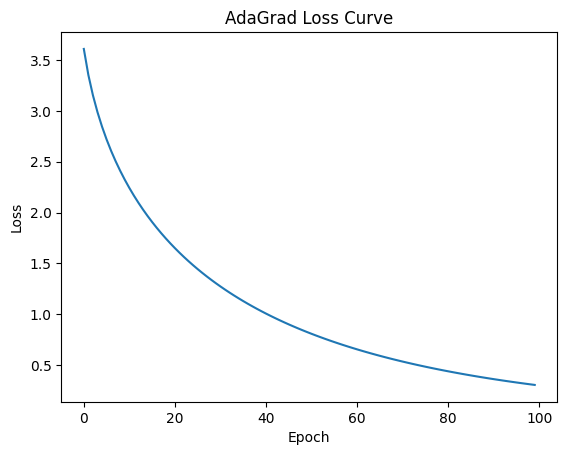

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def adagrad(learning_rate, epochs, f, x0, grad_f):
  """
  Implements the AdaGrad algorithm.

  Args:
      learning_rate: The learning rate to use.
      epochs: The number of epochs to train for.
      f: The function to optimize.
      x0: The initial guess for the minimum.
      grad_f: The gradient of the function to optimize.

  Returns:
      A list of losses over the training epochs.
  """

  losses = []
  x = x0
  h = np.zeros_like(x)  # Initialize historical gradient accumulator

  for epoch in range(epochs):
    g = grad_f(x)
    h += g**2  # Update historical gradient accumulator
    x -= learning_rate * g / (np.sqrt(h) + 1e-8)  # AdaGrad update with epsilon for stability
    loss = f(x)
    losses.append(loss)

  return losses

# Sample function and its gradient (replace with your actual function and gradient)
def f(x):
  return x**2

def grad_f(x):
  return 2*x

# Learning rate and number of epochs
learning_rate = 0.1
epochs = 100

# Initial guess
x0 = 2.0

# Run the AdaGrad algorithm
losses = adagrad(learning_rate, epochs, f, x0, grad_f)

# Visualize the loss curve
sns.lineplot(x=range(epochs), y=losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("AdaGrad Loss Curve")
plt.show()


#**Using Pima Indians Diabetes Database To Understand The Implementation Of AdaGrad Algorithm From Sratch**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardra1111","key":"37d20ba8d54c672e60004d474d1ebeed"}'}

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
%cd /content/kaggle.json

[Errno 20] Not a directory: '/content/kaggle.json'
/content


In [7]:
!chmod 600 /content/kaggle.json

In [8]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 17.4MB/s]


In [9]:
!unzip /content/pima-indians-diabetes-database

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**VISUALIZATION OF THE DATA**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

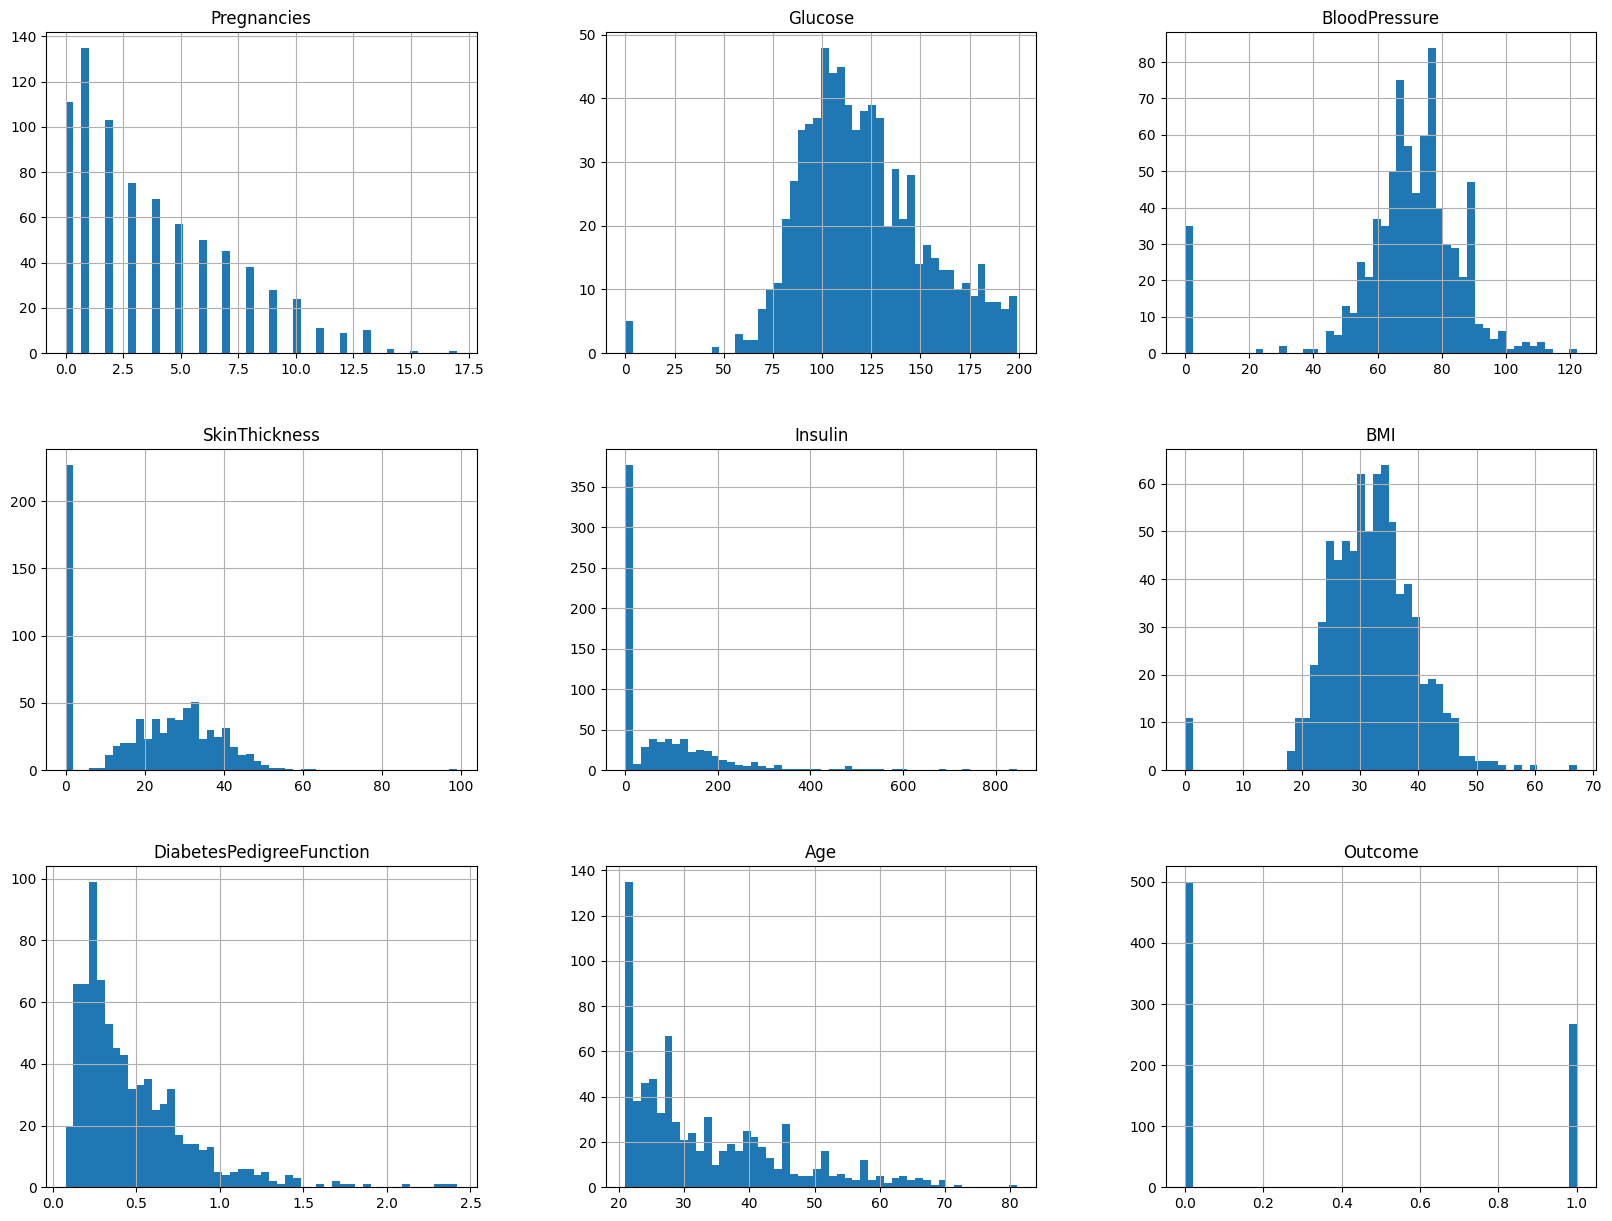

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

([<matplotlib.patches.Wedge at 0x7e786e485fc0>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90')])

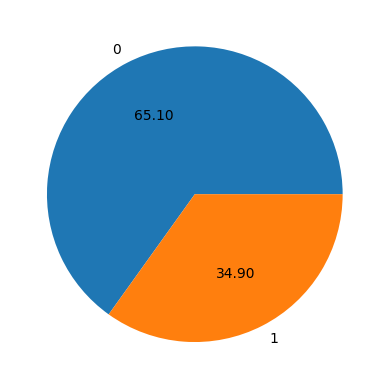

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Outcome'].value_counts(),labels=['0','1'],autopct="%0.2f")

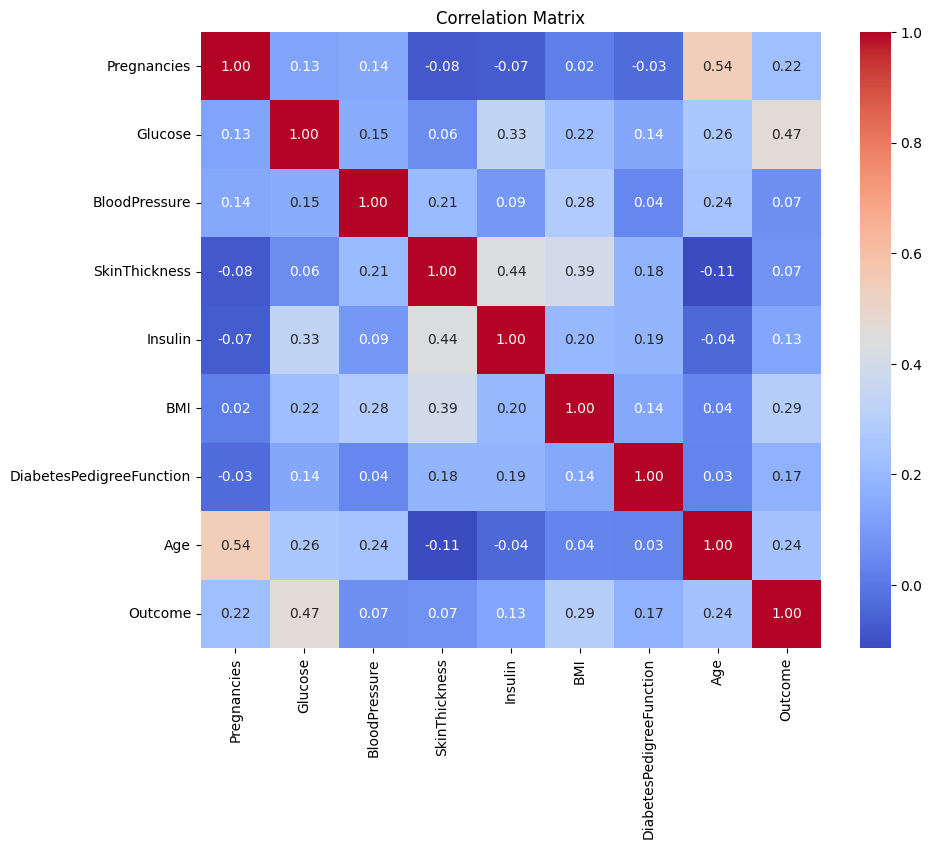

In [17]:
import pandas as pd
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score

# Feature engineering - create new features
df['BMI_Obesity'] = (df['BMI'] >= 30).astype(int)
df['High_BloodPressure'] = (df['BloodPressure'] > 80).astype(int)

# Separate the features and the target variable
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Combine X and y for cross-validation
data = np.hstack((X, y))
print(f"Train data distribution: {np.bincount(y_train.flatten())}")
print(f"Test data distribution: {np.bincount(y_test.flatten())}")

Train data distribution: [401 213]
Test data distribution: [99 55]



- **Importing Libraries:**
  - *`Importing NumPy`*: NumPy is imported as `np` for numerical operations.
  - *`Importing train_test_split and KFold`*: Functions from scikit-learn for data splitting and cross-validation are imported.
  - *`Importing accuracy_score`*: Function for evaluating model performance is imported.

- **Feature Engineering:**
  - *`Creating BMI_Obesity Feature`*: A new feature 'BMI_Obesity' is created based on BMI values, indicating obesity.
  - *`Creating High_BloodPressure Feature`*: Another feature 'High_BloodPressure' is created based on Blood Pressure values.

- **Data Splitting:**
  - *`Splitting into Training and Testing Sets`*: The dataset is divided into training and testing sets, with 80% for training and 20% for testing.

- **Cross-Validation Setup:**
  - *`Defining Number of Folds`*: The number of folds for cross-validation is set to 5.
  - *`Creating KFold Object`*: KFold object is initialized with shuffling and a specific random state for cross-validation.

- **Data Distribution Check:**
  - *`Checking Train Data Distribution`*: Displaying the distribution of classes in the training data.
  - *`Checking Test Data Distribution`*: Displaying the distribution of classes in the testing data.


##**BUILDING ADAGRAD ALGORITM FROM SCRATCH**

In [19]:
class AdaGrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.G = None

    def update(self, w, dw):
        if self.G is None:
            self.G = np.zeros_like(dw)

        self.G += dw ** 2
        adjusted_learning_rate = self.learning_rate / (np.sqrt(self.G) + self.epsilon)
        w -= adjusted_learning_rate * dw

        return w

**AdaGrad Class:**

- **Initialization**:
  - `__init__` method initializes the AdaGrad optimizer.
    - `learning_rate=0.01`: Sets the default learning rate to 0.01, controlling the step size during optimization. Higher values lead to larger steps, potentially faster convergence but may overshoot optimal values.
    - `epsilon=1e-8`: Sets the default epsilon value to 1e-8. Epsilon is added to the denominator to avoid division by zero, ensuring numerical stability in the computation of the adjusted learning rate.
    - `G = None`: Initializes the parameter update history `G` to None.

- **Update Method**:
  - `update` method updates the model parameters using the AdaGrad optimization algorithm.
    - Check if G is None:
      - If the parameter update history `G` is None, it initializes `G` to an array of zeros with the same shape as the gradient `dw`.
    - Update squared gradient history:
      - `self.G += dw ** 2`: Adds the element-wise square of the gradient `dw` to the squared gradient history `G`. This accumulates the squared gradients over time.
    - Compute adjusted learning rate:
      - `adjusted_learning_rate = self.learning_rate / (np.sqrt(self.G) + self.epsilon)`: Computes the adjusted learning rate using the AdaGrad formula. It divides the learning rate by the square root of the accumulated squared gradients plus epsilon.
    - Update model parameters:
      - `w -= adjusted_learning_rate * dw`: Updates the model parameters `w` by subtracting the adjusted learning rate multiplied by the gradient `dw`. This ensures larger updates for parameters associated with smaller gradients and vice versa.
    - Return updated parameters:
      - `return w`: Returns the updated model parameters `w`.


In [20]:
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization_param = regularization_param

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def compute_loss(self, y, y_pred):
        m = len(y)
        reg_term = (self.regularization_param / (2 * m)) * np.sum(np.square(self.theta))
        loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + reg_term
        return loss

    def compute_gradients(self, X, y, y_pred):
        m = len(y)
        reg_term = (self.regularization_param / m) * self.theta
        gradients = 1/m * np.dot(X.T, (y_pred - y)) + reg_term
        return gradients

    def fit(self, X, y):
        self.theta = np.zeros((X.shape[1], 1))
        adagrad = AdaGrad(learning_rate=self.learning_rate)
        self.losses = []

        for epoch in range(self.epochs):
            z = np.dot(X, self.theta)
            y_pred = self.sigmoid(z)
            gradients = self.compute_gradients(X, y, y_pred)
            self.theta = adagrad.update(self.theta, gradients)

            if epoch % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                self.losses.append(loss)
                print(f'Epoch {epoch}, Loss: {loss}')

        # Plot loss curve
        plt.plot(range(0, self.epochs, 100), self.losses, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def predict(self, X):
        z = np.dot(X, self.theta)
        y_pred = self.sigmoid(z)
        return y_pred >= 0.5



Epoch 0, Loss: 0.6931471887032644
Epoch 100, Loss: 0.608856076124505
Epoch 200, Loss: 0.6007003113872577
Epoch 300, Loss: 0.5961689317591516
Epoch 400, Loss: 0.5927840461856365
Epoch 500, Loss: 0.5900177138762875
Epoch 600, Loss: 0.58766187308215
Epoch 700, Loss: 0.585607222278803
Epoch 800, Loss: 0.5837867691741263
Epoch 900, Loss: 0.5821552836449152


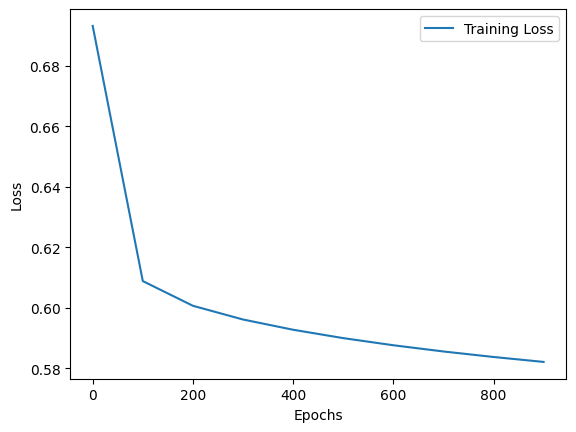

Epoch 0, Loss: 0.693147188703263
Epoch 100, Loss: 0.6068837212978575
Epoch 200, Loss: 0.5979448708865787
Epoch 300, Loss: 0.5932852689161868
Epoch 400, Loss: 0.590036393612678
Epoch 500, Loss: 0.5874920454948142
Epoch 600, Loss: 0.5853753672244261
Epoch 700, Loss: 0.5835532412579788
Epoch 800, Loss: 0.5819518807220706
Epoch 900, Loss: 0.5805253180117503


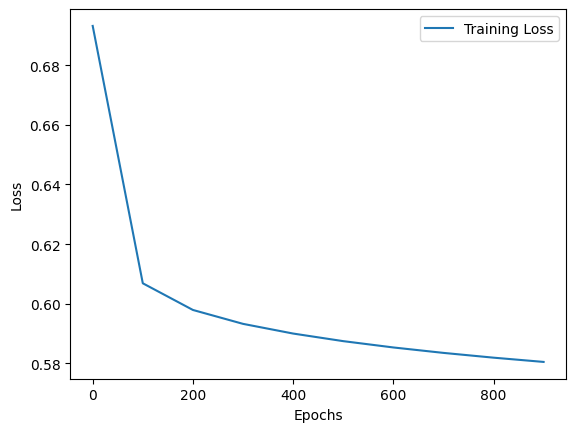

Epoch 0, Loss: 0.693147188703265
Epoch 100, Loss: 0.5874327988979037
Epoch 200, Loss: 0.5771449085684445
Epoch 300, Loss: 0.5717146961771482
Epoch 400, Loss: 0.5679389874735882
Epoch 500, Loss: 0.5649900198025615
Epoch 600, Loss: 0.5625348100977939
Epoch 700, Loss: 0.5604133844854161
Epoch 800, Loss: 0.5585386345275307
Epoch 900, Loss: 0.5568576401222923


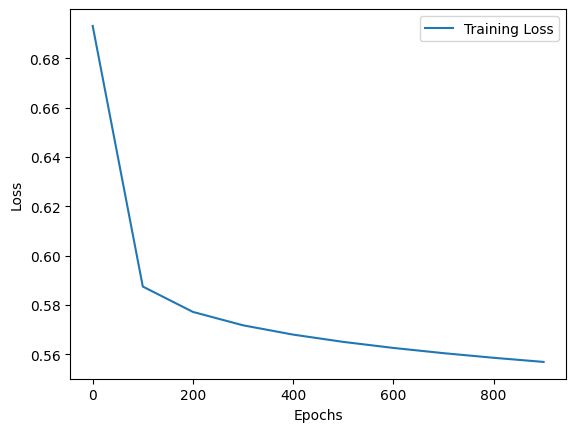

Epoch 0, Loss: 0.6931471886900238
Epoch 100, Loss: 0.610385333371742
Epoch 200, Loss: 0.6021322815620146
Epoch 300, Loss: 0.5977494358701916
Epoch 400, Loss: 0.5946870171142254
Epoch 500, Loss: 0.5922880035732946
Epoch 600, Loss: 0.5902905301221657
Epoch 700, Loss: 0.5885694487765002
Epoch 800, Loss: 0.5870558265804564
Epoch 900, Loss: 0.5857067665416612


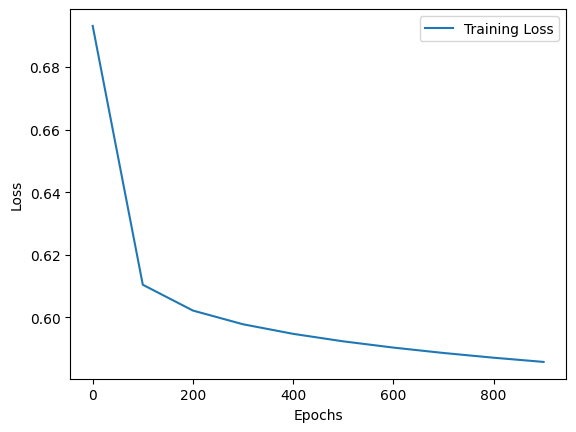

Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


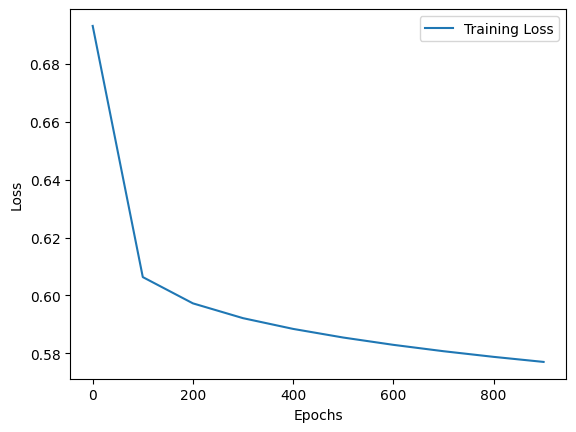

Average Accuracy: 71.62%
Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


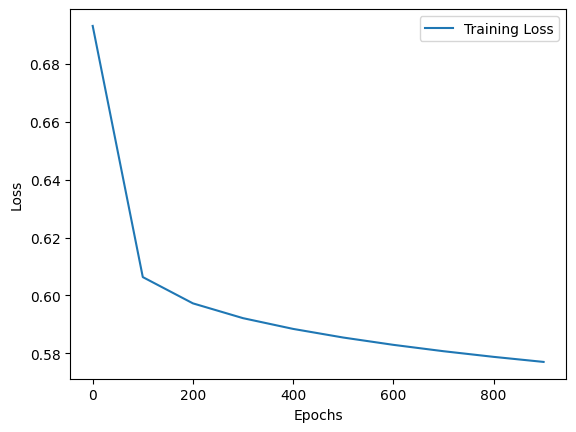

Test Set Accuracy: 79.87%


In [21]:
accuracies = []

# Perform cross-validation
for train_index, val_index in kf.split(data):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Instantiate the logistic regression model
    model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

# Evaluate on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')


**LogisticRegression Class:**
- **Initialization**:
  - `__init__` method initializes the LogisticRegression model with certain parameters.
    - `learning_rate=0.01`: Sets the default learning rate to 0.01, controlling the step size during optimization. Higher values mean larger steps during gradient descent.
    - `epochs=1000`: Sets the default number of epochs (iterations) for training the model. This determines how many times the entire dataset is passed through the model during training.
    - `regularization_param=0.01`: Sets the default regularization parameter to 0.01, which helps prevent overfitting by penalizing large parameter values.

- **Sigmoid Function**:
  - `sigmoid` method calculates the sigmoid function for a given input.
    - The sigmoid function maps any real-valued number to the range (0, 1), which is useful for binary classification problems.

- **Compute Loss Function**:
  - `compute_loss` method calculates the logistic loss function.
    - The loss function measures the difference between the predicted values (`y_pred`) and the actual values (`y`).
    - It computes the logistic loss by summing the negative log-likelihood of the predicted probabilities for each observation.
    - Additionally, it computes the regularization term to penalize large parameter values and control overfitting.
    - The overall loss is the sum of the logistic loss and the regularization term.

- **Compute Gradients Function**:
  - `compute_gradients` method calculates the gradients of the loss function with respect to the parameters.
    - It computes the gradient of the logistic loss function with respect to the parameters (`theta`) using the chain rule and the derivative of the sigmoid function.
    - Additionally, it computes the gradient of the regularization term to regularize the parameters.
    - The gradients are computed using the formula for the gradient of the logistic loss function and the regularization term.

- **Fit Method**:
  - `fit` method trains the logistic regression model using gradient descent with AdaGrad optimization.
    - It initializes the model parameters (`theta`) to zeros and creates an AdaGrad optimizer with the specified learning rate.
    - The method iterates over the specified number of epochs:
      - It computes the predicted values (`y_pred`) using the current parameters (`theta`).
      - It calculates the gradients of the loss function with respect to the parameters (`theta`).
      - It updates the parameters (`theta`) using the AdaGrad optimizer to minimize the loss.
      - It logs the loss at regular intervals during training.
    - Finally, it plots the training loss curve to visualize the model's learning progress over epochs.

- **Predict Method**:
  - `predict` method predicts binary outcomes based on input features.
    - It computes the predicted probabilities (`y_pred`) using the sigmoid function and the model parameters (`theta`).
    - It returns binary predictions based on a threshold of 0.5, where probabilities greater than or equal to 0.5 are classified as positive (1), and those less than 0.5 are classified as negative (0).


Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


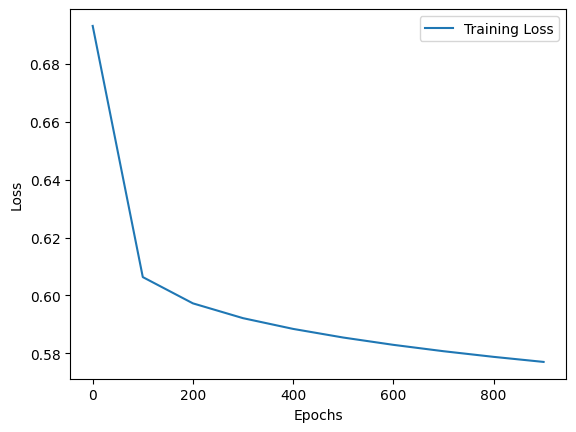

In [22]:

    # Instantiate the logistic regression model
    model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)

    # Fit the model to the training data
    model.fit(X_train, y_train)

**Logistic Regression Model Instantiation and Training:**

- **Instantiate the Logistic Regression Model**:
  - `model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)`: Instantiates the logistic regression model with specified hyperparameters.
    - Sets the learning rate to 0.01, controlling the step size during optimization.
    - Sets the number of epochs to 1000, determining the number of iterations for training.
    - Sets the regularization parameter to 0.01, which helps prevent overfitting.

- **Fit the Model to the Training Data**:
  - `model.fit(X_train, y_train)`: Fits the logistic regression model to the training data.
    - Trains the model using the training features (`X_train`) and labels (`y_train`).
    - During training, the model optimizes its parameters to minimize the loss function and improve predictive performance.
    - The optimization process occurs over multiple epochs, with the model updating its parameters iteratively to reduce the training loss.
    - After training, the model is ready to make predictions on new data.


**The observations for the Loss Curve curve:**

- **Steep Initial Decline:** There is a **sharp drop** in the **loss** within the **first 100 epochs**, indicating that the **model** is **learning quickly** and **effectively** adjusting its **parameters**.

- **Consistent Decrease:** The **loss** continues to **decrease steadily**, though at a **slower rate**, as the **epochs progress**. This **steady decline** suggests that the **model** is **continuing to learn** and **refine its parameters** without **major oscillations** or **instability**.

- **Smoothing Out:** The **curve flattens out** towards the **later epochs**, indicating that the **model** is **converging towards** a **minimum loss**. This is a **good sign** as it suggests the **model** is **approaching optimal performance**.

- **Final Loss Value:** The **final loss value** appears to be around **0.58**, which is **lower than** the **initial value**, showing that the **training process** has **reduced the loss effectively**.

**Overall**, this **loss curve** is **indicative of** a **good training process**. The **model** is **learning quickly initially** and then **refining its performance steadily**, leading to **convergence**. The **steady and consistent decrease** without **major fluctuations** is a **positive sign** of the **training's effectiveness**.


In [23]:
# Final prediction and evaluation
from sklearn.metrics import accuracy_score, precision_score
final_predictions = model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')
print(f'Final Precision: {final_precision* 100:.2f}%')


Final Accuracy: 79.87%
Final Precision: 81.58%


In [24]:
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, final_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

Confusion Matrix:
[[92  7]
 [24 31]]


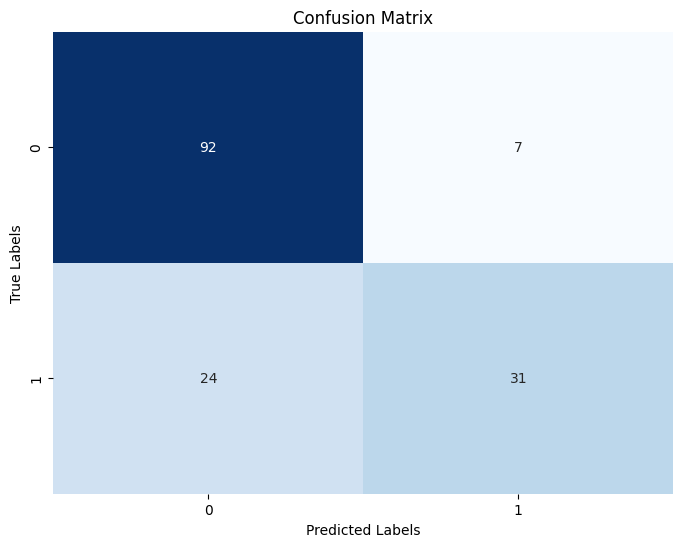

In [25]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')